In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import ast

In [3]:
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [4]:
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
df['job_skills']= df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

In [5]:
df_US = df[df['job_country'] == 'United States']


In [6]:
df_skills = df_US.explode('job_skills')
df_skills[['job_title','job_skills']]

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,None
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
...,...,...
785692,Data Scientist- Hybrid Work Location,r
785703,Data Analyst - CRYPTOGRAPHY - Full-time,None
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


In [7]:
df_skills_count = df_skills.groupby(['job_skills' , 'job_title_short']).size()
df_skills_count = df_skills_count.reset_index( name = 'skill_count')
df_skills_count.sort_values(by = 'skill_count', ascending = False ,inplace = True)
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [8]:
job_titles = df_skills_count['job_title_short'].unique().tolist()
job_titles = job_titles[:3]
job_titles

['Data Scientist', 'Data Analyst', 'Data Engineer']

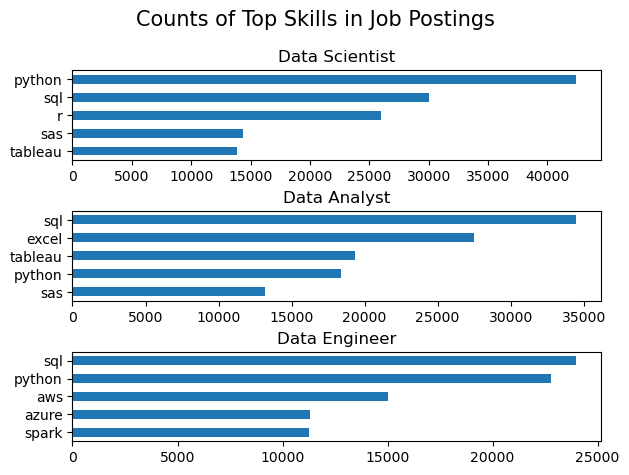

In [9]:
fig ,ax = plt.subplots(len(job_titles),1)

for i,job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind = 'barh',x = 'job_skills',y = 'skill_count',ax = ax[i],title = job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings',fontsize = 15)
fig.tight_layout(h_pad = 0.5)
plt.show()

In [10]:
df_job_title_count = df_US ['job_title_short'].value_counts().reset_index(name = 'jobs_total')

In [11]:
 df_skills_perc =pd.merge(df_skills_count , df_job_title_count ,how = 'left' ,on = 'job_title_short')
 df_skills_perc['skills_percent'] =  100 *df_skills_perc['skill_count']/ df_skills_perc['jobs_total']
 df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skills_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


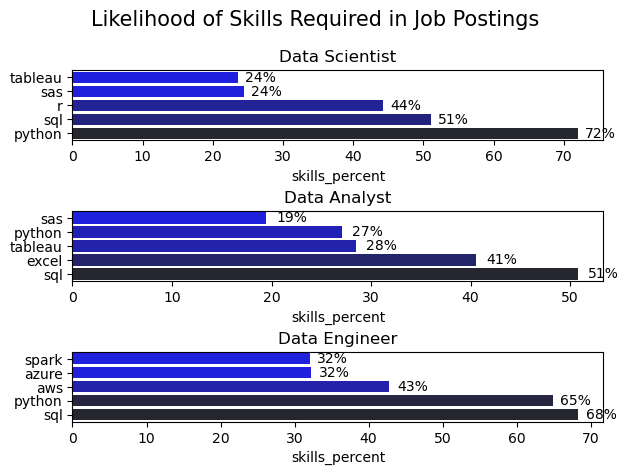

In [12]:
fig ,ax = plt.subplots(len(job_titles),1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    
    sns.barplot(
        data=df_plot, x='skills_percent', y='job_skills', ax=ax[i], 
        hue='skill_count', palette='dark:b_r'
    )
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)
    ax[i].set_title(job_title, fontsize=12)

    for n,v in enumerate(df_plot['skills_percent']):
        ax[i].text(v + 1, n,f'{v:.0f}%' , va='center')
fig.suptitle('Likelihood of Skills Required in Job Postings',fontsize = 15)
fig.tight_layout(h_pad = 0.5)
plt.show() 